In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('heart.csv')
print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [6]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

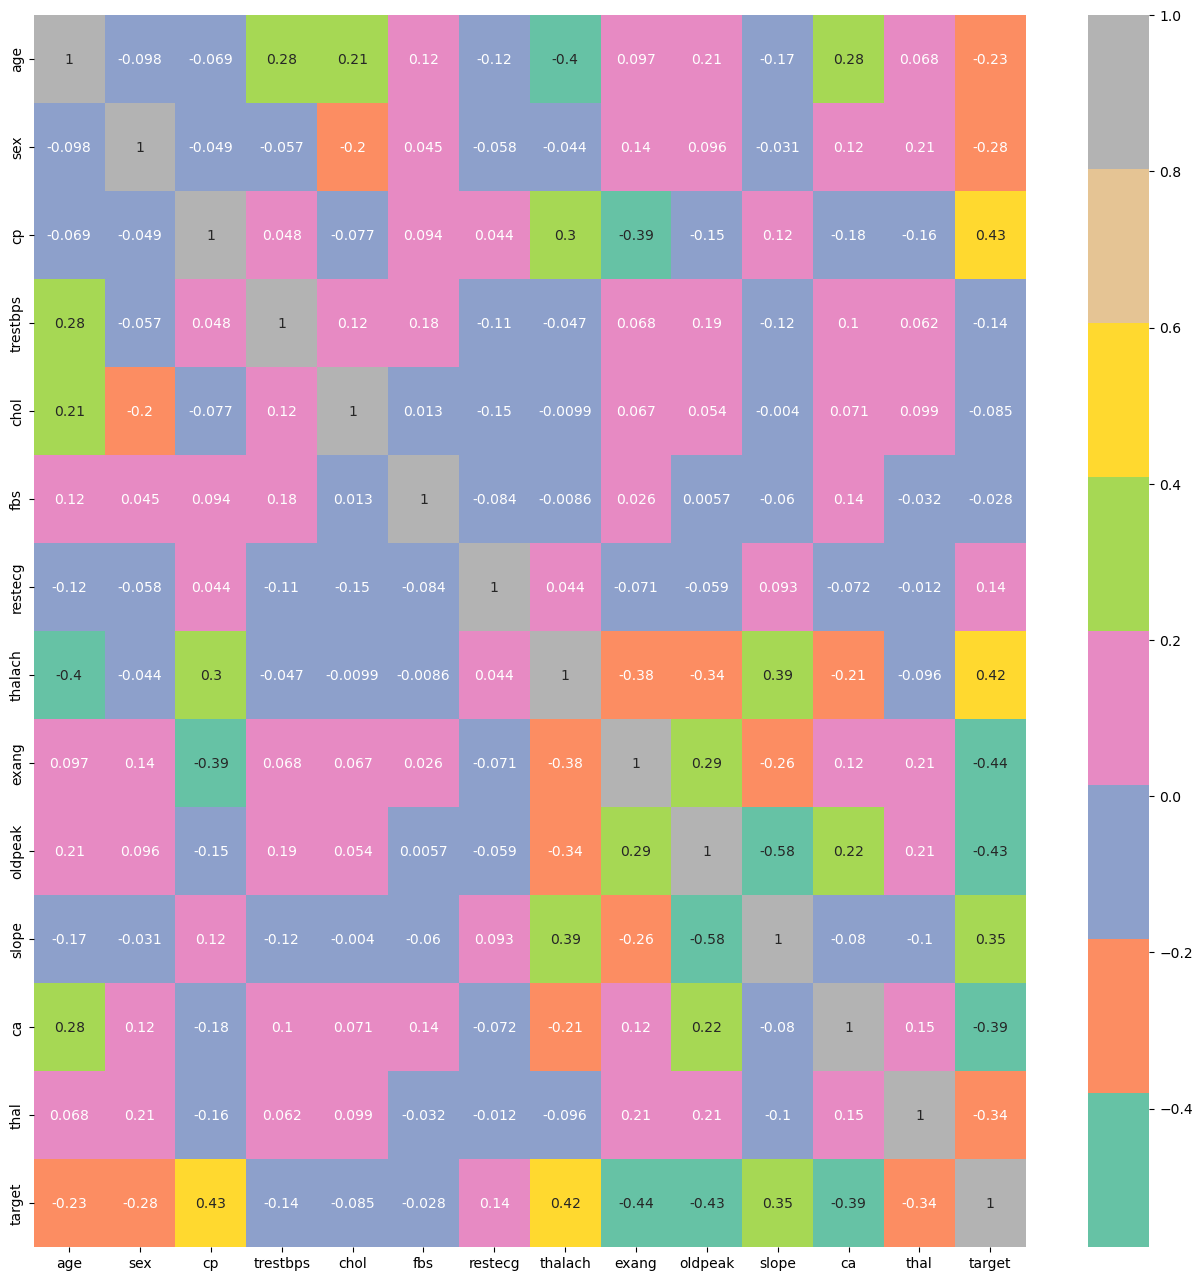

In [8]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="Set2")
plt.show()

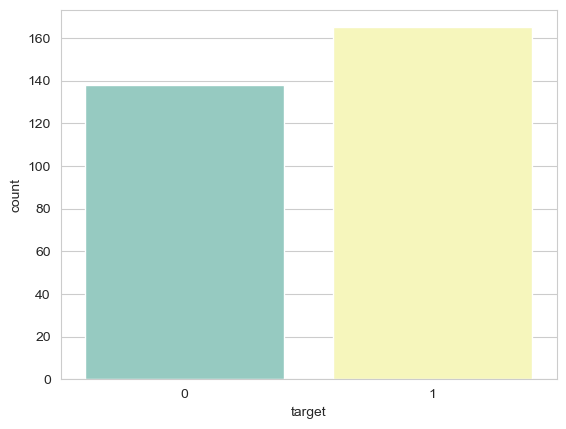

In [24]:

sns.countplot(x='target',data=df,palette='Set3')
plt.show()

In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 
                                        'fbs','restecg', 
                                        'exang', 'slope', 
                                        'ca', 'thal'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [11]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

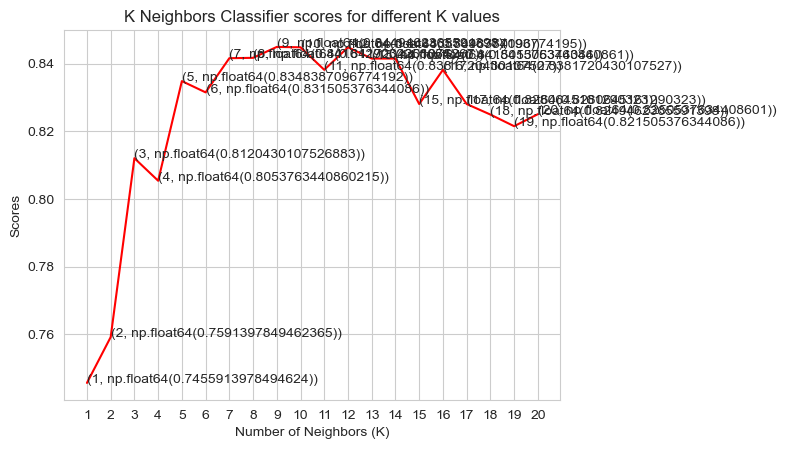

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

np.float64(0.8448387096774195)

In [15]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

np.float64(0.8019354838709678)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split dataset for training/testing
X = dataset.drop('target', axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the final model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
print("Enter patient details:")
age = int(input("Age: "))
sex = int(input("Sex (1 = Male, 0 = Female): "))
cp = int(input("Chest pain type (0–3): "))
trestbps = int(input("Resting blood pressure: "))
chol = int(input("Cholesterol: "))
fbs = int(input("Fasting blood sugar >120mg/dl (1=True, 0=False): "))
restecg = int(input("Resting ECG results (0–2): "))
thalach = int(input("Maximum heart rate achieved: "))
exang = int(input("Exercise induced angina (1=True, 0=False): "))
oldpeak = float(input("ST depression: "))
slope = int(input("Slope of peak exercise ST segment (0–2): "))
ca = int(input("Number of major vessels (0–3): "))
thal = int(input("Thal (1=normal, 2=fixed defect, 3=reversible defect): "))

new_df = pd.DataFrame([{
    'age': age, 'sex': sex, 'cp': cp, 'trestbps': trestbps, 'chol': chol,
    'fbs': fbs, 'restecg': restecg, 'thalach': thalach, 'exang': exang,
    'oldpeak': oldpeak, 'slope': slope, 'ca': ca, 'thal': thal
}])

Enter patient details:


Age:  50
Sex (1 = Male, 0 = Female):  1
Chest pain type (0–3):  2
Resting blood pressure:  130
Cholesterol:  230
Fasting blood sugar >120mg/dl (1=True, 0=False):  1
Resting ECG results (0–2):  2
Maximum heart rate achieved:  250
Exercise induced angina (1=True, 0=False):  1
ST depression:  2
Slope of peak exercise ST segment (0–2):  2
Number of major vessels (0–3):  1
Thal (1=normal, 2=fixed defect, 3=reversible defect):  1


In [20]:
#new_df = pd.get_dummies(new_df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])


In [19]:
# Add missing columns (if any)
for col in X.columns:
    if col not in new_df.columns:
        new_df[col] = 0

# Reorder columns to match training data
new_df = new_df[X.columns]


In [20]:
new_df[columns_to_scale] = standardScaler.transform(new_df[columns_to_scale])


In [21]:
prediction = model.predict(new_df)


In [22]:
if prediction[0] == 1:
    print("🚨 The patient is likely to have heart disease.")
else:
    print("✅ The patient is likely healthy (no heart disease).")


✅ The patient is likely healthy (no heart disease).


In [23]:
import joblib

joblib.dump(model, 'heart_model.pkl')
joblib.dump(standardScaler, 'scaler.pkl')
joblib.dump(list(X.columns), 'X_columns.pkl')   # to remember feature order


['X_columns.pkl']